# Demo Notebook: Roboflow Dataset Analysis

In this notebook, we'll be downloading a dataset from Roboflow and analyzing it using the `data_gradients` library.
We'll focus on a soccer dataset and perform detection analysis on it.

Let's start by installing the necessary package.

In [3]:
!pip install roboflow
!pip install git+https://github.com/Deci-AI/data-gradients


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/Deci-AI/data-gradients to /private/var/folders/th/w7nvksbd37vbkkm5r39s4dcc0000gn/T/pip-req-build-7a630h_i
  Running command git clone --filter=blob:none --quiet https://github.com/Deci-AI/data-gradients /private/var/folders/th/w7nvksbd37vbkkm5r39s4dcc0000gn/T/pip-req-build-7a630h_i
  Resolved https://github.com/Deci-AI/data-gradients to commit 89d3e8dea16d7567c00fe69a9aaa90f3a501254b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  Created wheel for data-gradients: filename=data_gradients-0.1.4+master-py3-none-any.whl size=451782 sha256=969f16c5492686dec0edfd74589d8d4eddd92fd0cccbfca532ec69c856a348ca
  Stored in directory: /private/var/folders/th/w7nvksbd37vbkkm5r39s4dcc0000gn/T/pip-ephem-wheel-cache-y_aeioz8/wheels/e7/47/f5/bf0fdd72e63a14396c68f48d540e0ad408436e1c63b9ed9fa5
Successfully built data-gradients
  Attempting uninstall: data-gradients
    Found existing installation: data-gradients 0.1.4+master
    Uninstalling data-gradients-0.1.4+master:
      Successfully uninstalled data-gradients-0.1.4+master

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Download the Dataset from Roboflow

We'll first fetch the dataset from Roboflow. 
Make sure to have your Roboflow API key `ROBOFLOW_API_KEY` set up in the environment variables.

For this example, we will download the dataset `soccer-players-5fuqs` that includes the classes `["Ball", "Player", "Referee"]`

In [2]:
import os
from roboflow import Roboflow


rf_key = os.getenv("ROBOFLOW_API_KEY")
rf = Roboflow(api_key=rf_key)  # Make sure to set a valid API key
project = rf.workspace("roboflow-100").project("soccer-players-5fuqs")
dataset = project.version(2).download("darknet")

CLASS_NAMES = ["Ball", "Player", "Referee"]  # Make sure to change depending on the dataset

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to soccer-players-2 in darknet:: 100%|████████████████████████████████████████████████████████████████████████████| 334/334 [00:00<00:00, 4179.80it/s]


## Load the Dataset

Next, we'll load the dataset using the Yolo format. This format mixes images and labels in the same directory (such as `train` and `valid`).


In [3]:
from data_gradients.datasets.detection.yolo_format_detection_dataset import YoloFormatDetectionDataset

train_loader = YoloFormatDetectionDataset(root_dir=dataset.location, images_dir="train", labels_dir="train")
val_loader = YoloFormatDetectionDataset(root_dir=dataset.location, images_dir="valid", labels_dir="valid")

## Run the Analysis

With the dataset loaded, we'll now run the detection analysis on it.

INFO:data_gradients.utils.summary_writer:`log_dir` was not set, so the logs will be saved in /Users/Louis.Dupont/PycharmProjects/data-gradients/examples/logs/soccer-players-5fuqs
INFO:data_gradients.dataset_adapters.config.data_config:Cache deactivated for `DetectionDataConfig`.


  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 114 
  - len(val_data): 33 
  - log directory: /Users/Louis.Dupont/PycharmProjects/data-gradients/examples/logs/soccer-players-5fuqs 
  - Archive directory: /Users/Louis.Dupont/PycharmProjects/data-gradients/examples/logs/soccer-players-5fuqs/archive_20230928-114431 
  - feature extractor list: {'Image Features': [SummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Object Detection Features': [DetectionSampleVisualization, DetectionClassHeatmap, DetectionBoundingBoxArea, DetectionBoundingBoxPerImageCount, DetectionBoundingBoxSize, DetectionClassFrequency, DetectionClassesPerImageCount, DetectionBoundingBoxIoU, DetectionResizeImpact]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. cl

Analyzing... :   0%|                                                                                                                                         | 0/114 [00:00<?, ?it/s]

OPTIONSSS


Great! You chose: `True`
OPTIONSSS


Analyzing... :   1%|█▏                                                                                                                               | 1/114 [00:03<06:56,  3.68s/it]

Great! You chose: `cxcywh`


Summarizing... : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.30s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`DetectionDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /Users/Louis.Dupont/PycharmProjects/data-gradients/examples/logs/soccer-players-5fuqs
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /Users/Louis.Dupont/PycharmProjects/data-gradients/examples/logs/soccer-players-5fuqs/archive_20230928-114431
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


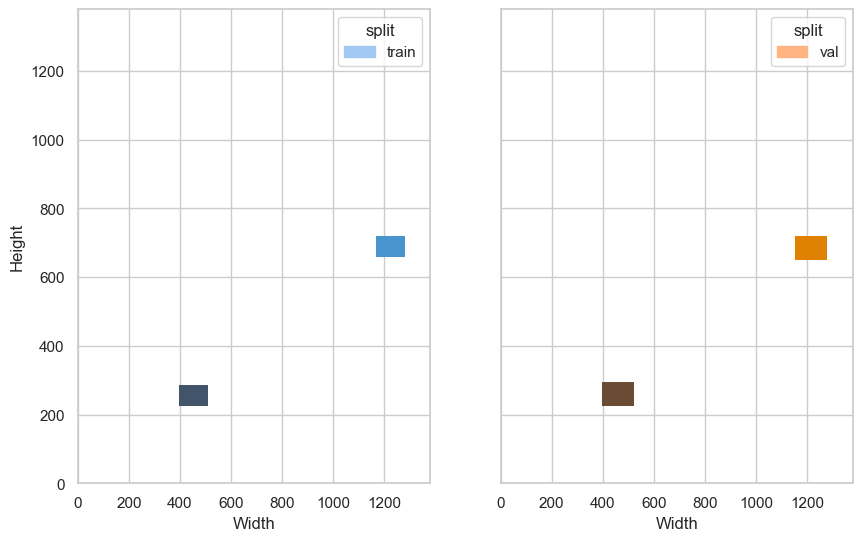

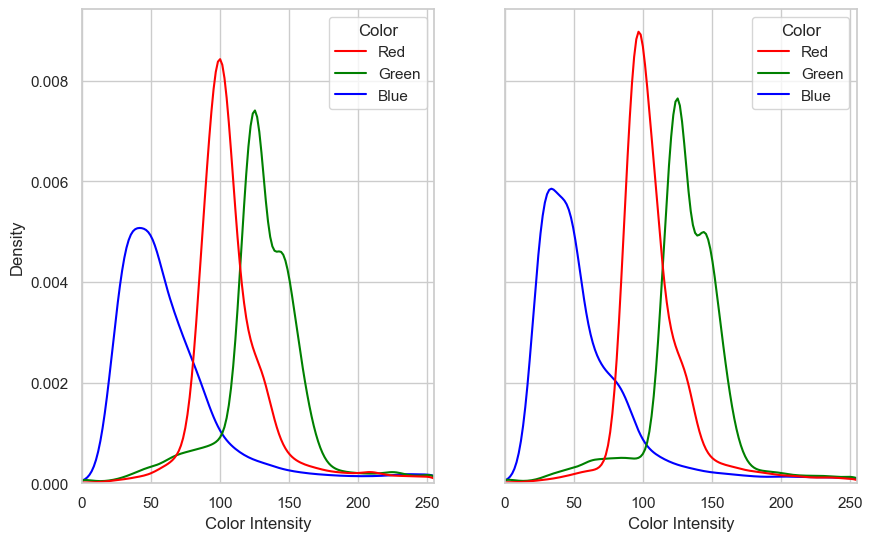

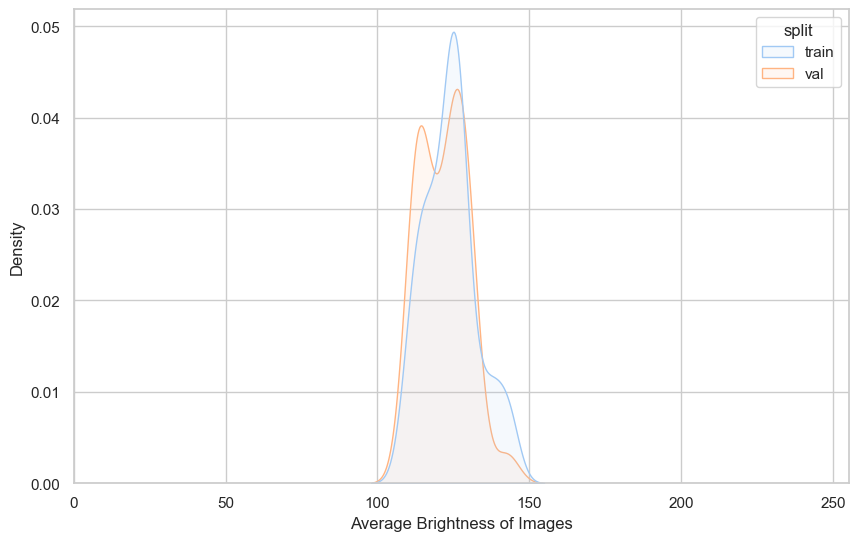

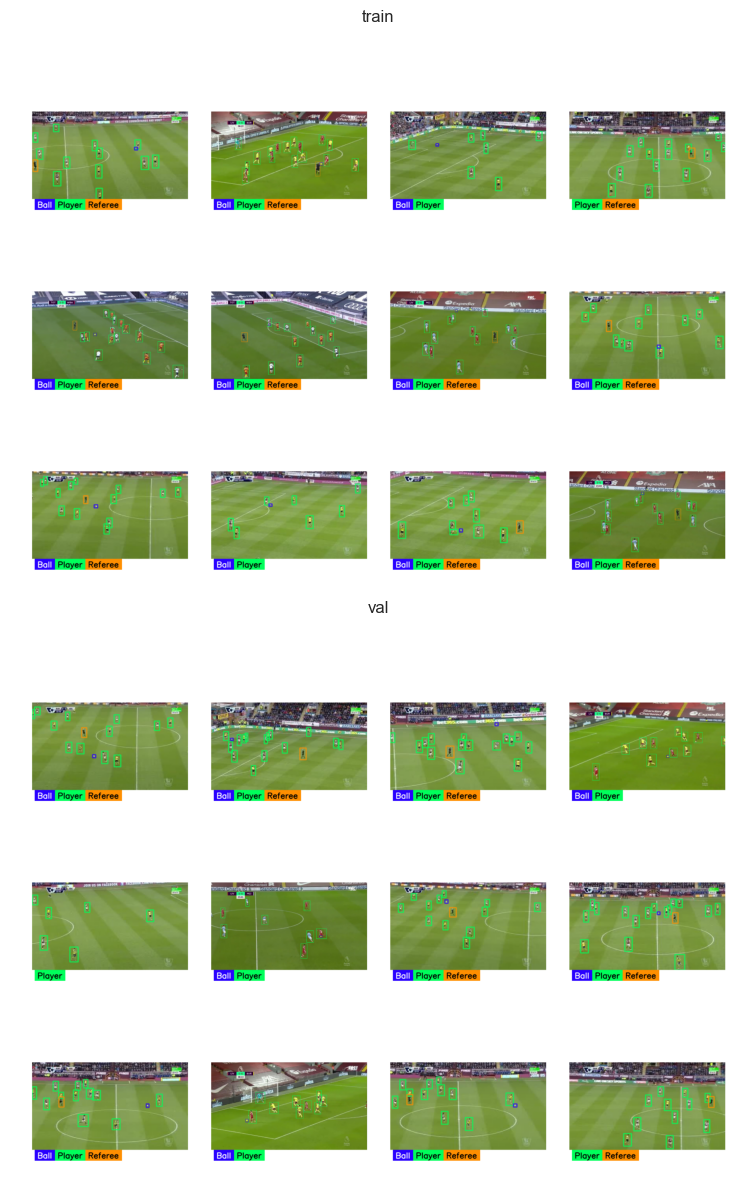

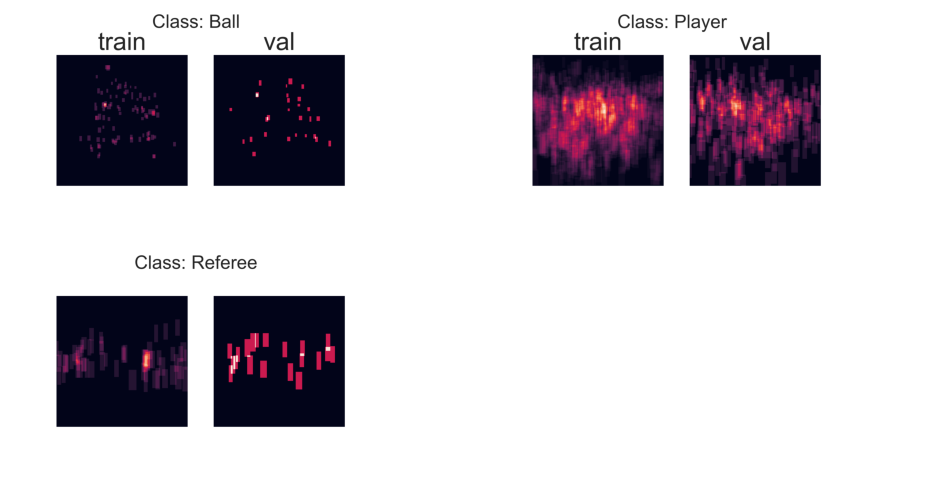

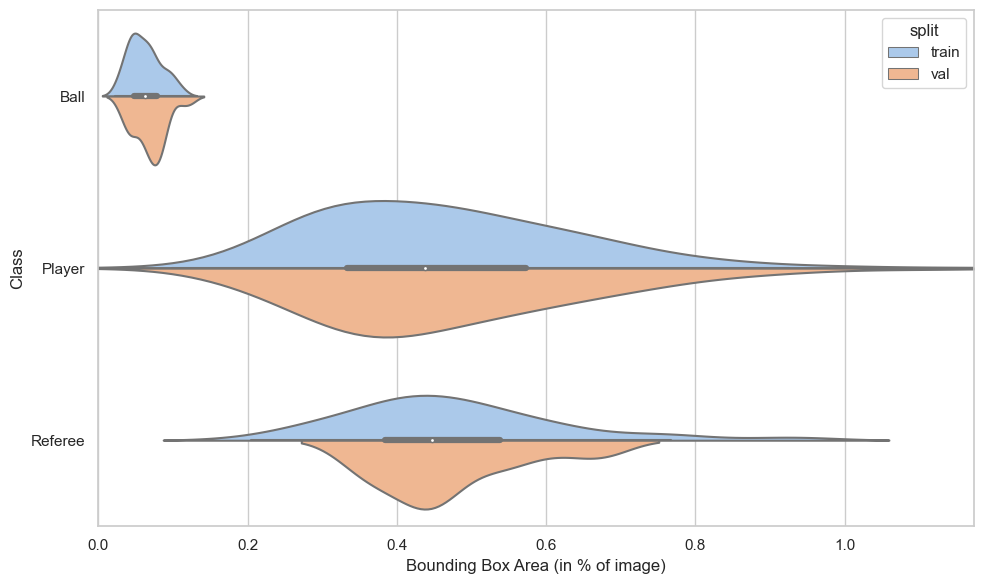

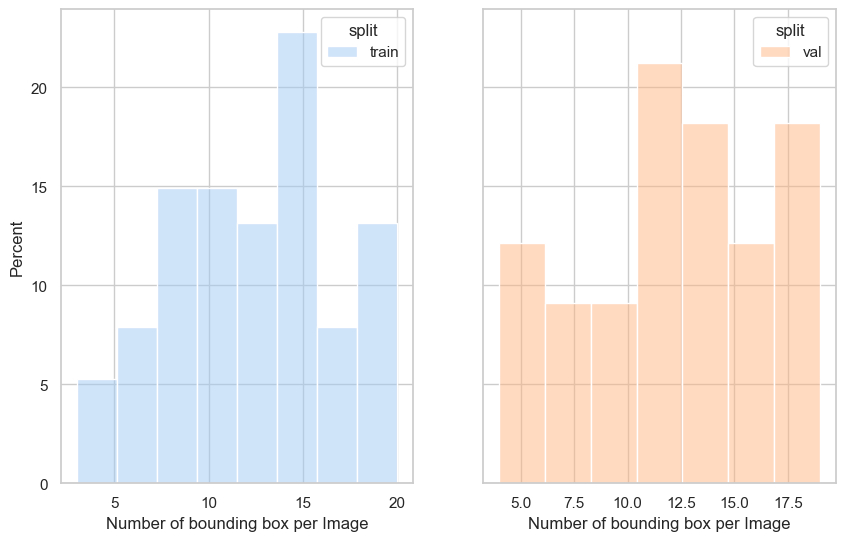

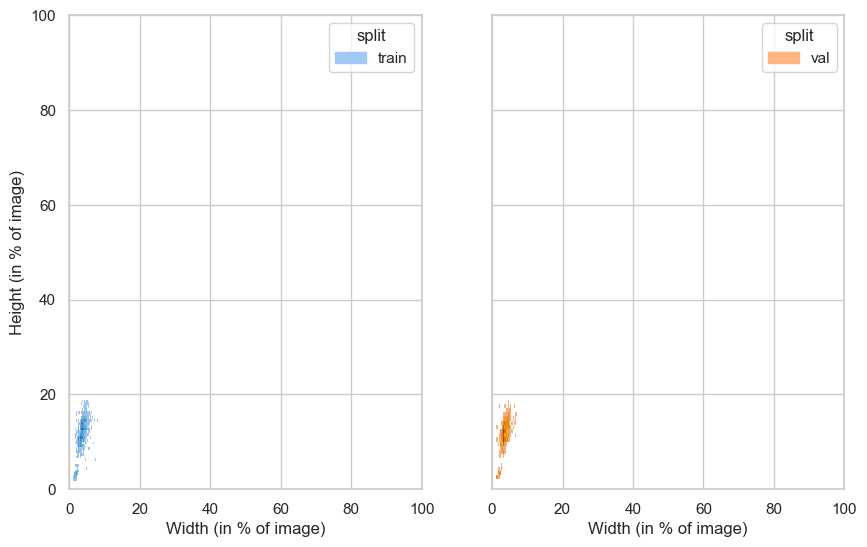

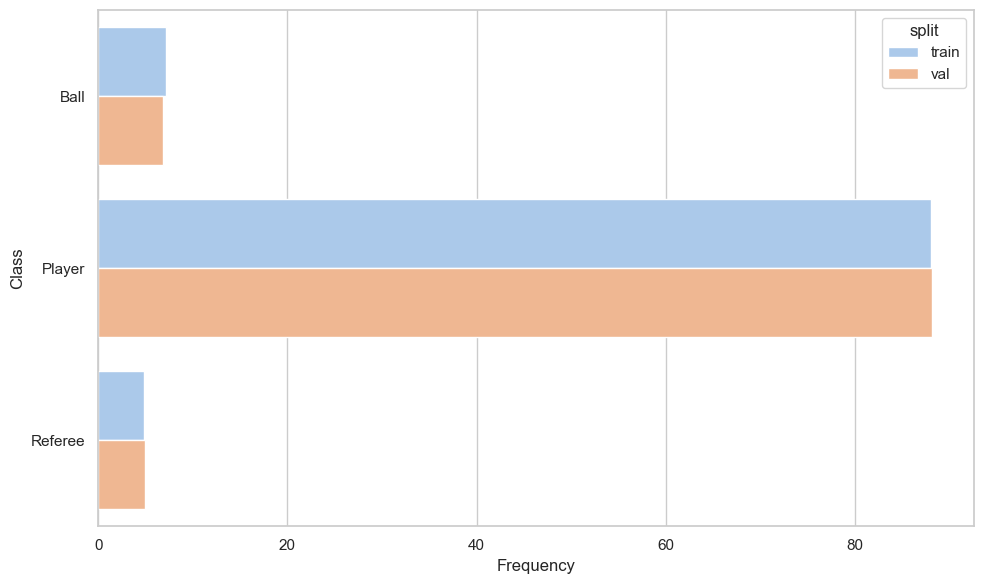

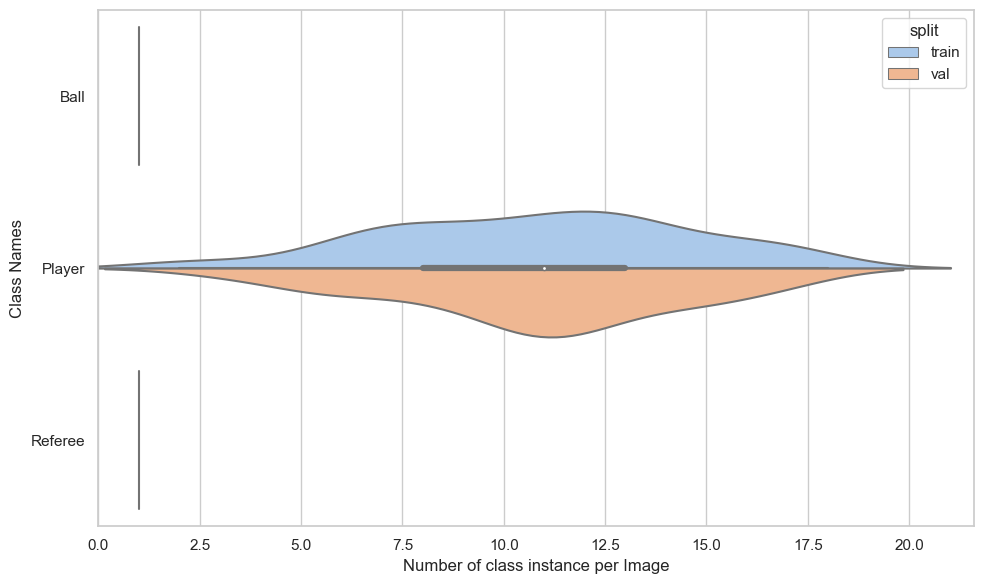

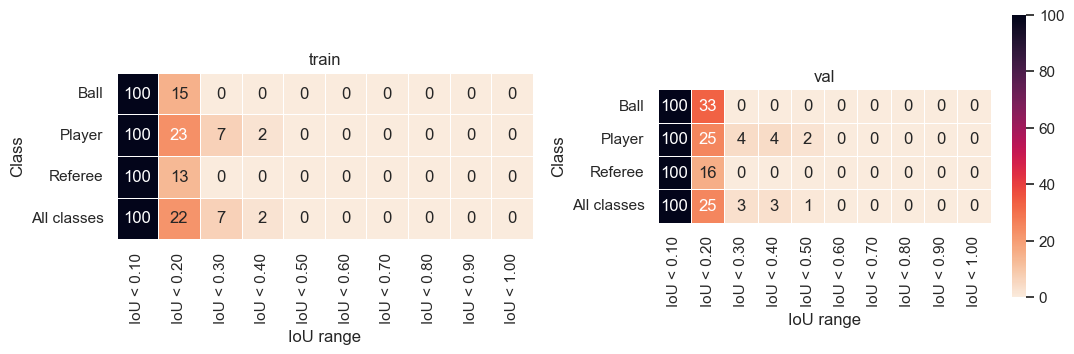

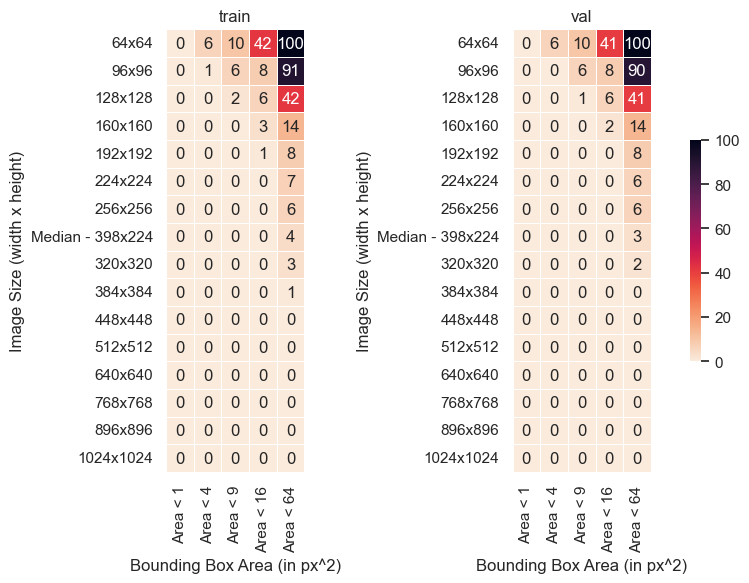

In [4]:
from data_gradients.managers.detection_manager import DetectionAnalysisManager

analyzer = DetectionAnalysisManager(
    report_title="soccer-players-5fuqs",
    train_data=train_loader,
    val_data=val_loader,
    class_names=CLASS_NAMES,
)

analyzer.run()

## Conclusion

We've successfully fetched the dataset from Roboflow, loaded it, and ran a detection analysis. Further exploration and visualization can be done based on the results of the analysis.